In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [9]:
soleado = pd.read_csv('Datos soleado cada 5 min')
nublado = pd.read_csv('Datos nublado cada 5 min')
p_nublado = pd.read_csv('Datos parcialmente nublado cada 5 min')
print('Tamaño soleado:',len(soleado))
print('Tamaño nublado:',len(nublado))
print('Tamaño parcialmente nublado:',len(p_nublado))

Tamaño soleado: 9480
Tamaño nublado: 12840
Tamaño parcialmente nublado: 32640


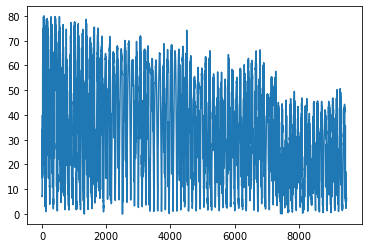

In [3]:
soleado['Potencia [kW]'].plot()

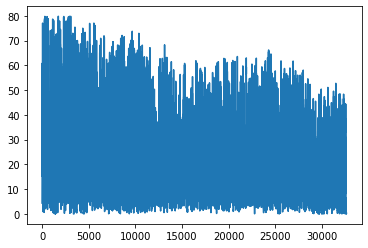

In [4]:
p_nublado['Potencia [kW]'].plot()

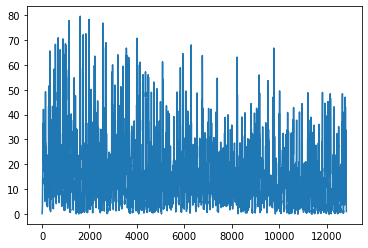

In [5]:
nublado['Potencia [kW]'].plot()

In [6]:
print('Energia media soleado:',soleado['Potencia [kW]'].values.mean())
print('Energia media p_nublad:',p_nublado['Potencia [kW]'].values.mean())
print('Energia media nublado:',nublado['Potencia [kW]'].values.mean())

Energia media soleado: 32.14150105485232
Energia media p_nublad: 20.294000919117646
Energia media nublado: 13.232911214953273


In [8]:
print('Desv potencia soleado:',soleado['Potencia [kW]'].values.std())
print('Desv potencia p_nublad:',p_nublado['Potencia [kW]'].values.std())
print('Desv potencia nublado:',nublado['Potencia [kW]'].values.std())

Desv potencia soleado: 19.81035092176458
Desv potencia p_nublad: 14.898523334327603
Desv potencia nublado: 11.070619686700871


### Funcion mape

In [11]:
#Mape = (1/N)* sumatoria(|(real-predicho)|/real)*100

def mape_funcion (real,pronostico,shift):
    real = real[shift:]
    pronostico = pronostico[shift:]
    N = len(real)
    #print(real[0])
    error = []
    for i in range(N):
        if real[i]== 0 :
            N=N-1
        else:
            error.append(np.abs(real[i]-pronostico[i])/real[i])

    return sum(error)/N*100,'%'

## Persistencia soleados

In [48]:
shift = 1
sol_real = soleado['Potencia [kW]']
sol_pron = sol_real.shift(shift)

In [49]:
rmse_sol = math.sqrt(mean_squared_error(sol_real[1:],sol_pron[1:]))
mae_sol = mean_absolute_error(sol_real[1:],sol_pron[1:])

In [67]:
mape_sol = mape_funcion(sol_real.values,sol_pron.values,1)
corre = np.corrcoef(sol_real[1:],sol_pron[1:])

In [68]:
print('El RMSE soleado es:',rmse_sol)
print('El MAE soleado es:',mae_sol)
print('El MAPE soleado es:',mape_sol)
corre

El RMSE soleado es: 8.18911718167548
El MAE soleado es: 4.5623103702922245
El MAPE soleado es: (20.598144709525748, '%')


array([[1.        , 0.91455389],
       [0.91455389, 1.        ]])

## Persistencia parcialmente nublado

In [17]:
shift = 1
parcial_real = p_nublado['Potencia [kW]']
parcial_pron = parcial_real.shift(shift) 

In [71]:
rmse_parcial = math.sqrt(mean_squared_error(parcial_real[shift:],parcial_pron[shift:]))
mae_parcial   = mean_absolute_error(parcial_real[shift:],parcial_pron[shift:])
mape_parcial = mape_funcion(parcial_real.values,parcial_pron.values,shift)
corre = np.corrcoef(parcial_real[shift:],parcial_pron[shift:])

In [72]:
print('El RMSE soleado es:',rmse_parcial)
print('El MAE soleado es:',mae_parcial)
print('El MAPE soleado es:',mape_parcial)
corre

El RMSE soleado es: 7.519170108752722
El MAE soleado es: 4.443239988970251
El MAPE soleado es: (24.307800312963725, '%')


array([[1.        , 0.87264099],
       [0.87264099, 1.        ]])

## Persistencia nublado

In [20]:
shift = 1
nublado_real = nublado['Potencia [kW]']
nublado_pron = nublado_real.shift(shift) 

In [73]:
rmse_nublado = math.sqrt(mean_squared_error(nublado_real[shift:],nublado_pron[shift:]))
mae_nublado   = mean_absolute_error(nublado_real[shift:],nublado_pron[shift:])
mape_nublado = mape_funcion(nublado_real.values,nublado_pron.values,shift)
corre = np.corrcoef(nublado_real[shift:],nublado_pron[shift:])

In [74]:
print('El RMSE soleado es:',rmse_nublado)
print('El MAE soleado es:',mae_nublado)
print('El MAPE soleado es:',mape_nublado)
corre

El RMSE soleado es: 5.1283041822167235
El MAE soleado es: 2.7364132720616867
El MAPE soleado es: (23.609551536205007, '%')


array([[1.        , 0.89270376],
       [0.89270376, 1.        ]])

## Persistencia total

In [44]:
datos = pd.read_csv('DatosFinales.csv')
datos = datos[datos.Hora != '6:00']
datos = datos[datos.Hora != '17:00']
datos = datos.set_index(np.array(range(len(datos))))
print((0.05+0.1+0.18+0.28)/4)
datos.tail(20)

0.15250000000000002


,Unnamed: 0,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C]
54940,54940,31/12/2020,15:20,0.01,5.15,13.35
54941,54941,31/12/2020,15:25,0.07,8.20,13.03
54942,54942,31/12/2020,15:30,0.18,11.58,13.07
54943,54943,31/12/2020,15:35,0.24,13.80,13.50
54944,54944,31/12/2020,15:40,0.50,19.82,13.74
54945,54945,31/12/2020,15:45,0.52,20.15,13.79
54946,54946,31/12/2020,15:50,0.41,17.74,13.98
54947,54947,31/12/2020,15:55,0.43,18.37,14.01
54948,54948,31/12/2020,16:00,0.26,14.07,13.74
54949,54949,31/12/2020,16:05,0.36,16.77,13.73


In [45]:
total_real = datos['Potencia [kW]']
total_pron = total_real.shift()

In [46]:
rmse_total = math.sqrt(mean_squared_error(total_real[shift:],total_pron[shift:]))
mae_total   = mean_absolute_error(total_real[shift:],total_pron[shift:])
mape_total = mape_funcion(total_real.values,total_pron.values,shift)
corre = np.corrcoef(parcial_real[shift:],parcial_pron[shift:])

In [47]:
print('El RMSE total es:',rmse_total)
print('El MAE total es:',mae_total)
print('El MAPE total es:',mape_total)

El RMSE total es: 7.161425187945386
El MAE total es: 4.064926399679761
El MAPE total es: (23.555830453758443, '%')
